# Métodos Numéricos 2024

## Guía 4: 2024-05-02 - Ajuste por Cuadrados Mínimos

In [9]:
using Plots
using LaTeXStrings
import Pkg
#Pkg.add("CSV")
Pkg.add("LsqFit")
#Pkg.add("LinearAlgebra")
using DataFrames
using CSV
using LsqFit
using LinearAlgebra

    Updating registry at `C:\Users\Solis\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Solis\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Solis\.julia\environments\v1.10\Manifest.toml`


###  Problema 1 

Escriba una función de Julia que permita encontrar la mejor recta que aproxime un conjunto de $n$ puntos utilizando el **método de cuadrados mínimos**.
La función tiene que tomar como argumentos dos vectores que contengan las coordenadas $x_i$ e $y_i$ de los $n$ puntos.
La función debe retornar una tupla $(a_0,a_1)$ con los coeficientes $a_0$ y $a_1$ de la recta $y(x) = a_0 + a_1 x$ que ajusta los puntos.

In [10]:
##estas son las funciones que voy a usar para el metodo de cuadrados mínimos
function suma_cuadrado(vector)#suma los valores en cada posicion del vector elevadas al cuadrado
    n=length(vector)
    suma=0
    for i in 1:n
        suma+=(vector[i])^2
    end
    return suma
end
##
function suma_normal(vector) #suma los valores en cada posicion del vector
    n=length(vector)
    suma=0
    for i in 1:n
        suma+=(vector[i])
    end
    return suma
end
##
function suma_con_producto(vector1,vector2) #ruma del producto posicion a posición
    @assert length(vector1)==length(vector2) #tienen que tener mismo tamaño
    n=length(vector1)
    suma=0
    for i in 1:n
        suma+=(vector1[i]*vector2[i])
    end
    return suma
end

suma_con_producto (generic function with 1 method)

In [11]:
#Método de cuadrados mínimos:D
function cuadrados_minimos(vecx,vecy)
    @assert length(vecx)==length(vecy)
    m=length(vecx)
    #calculo a0:
    numerador1=(suma_cuadrado(vecx)*suma_normal(vecy))-(suma_con_producto(vecx,vecy)*suma_normal(vecx))
    denominador1=m*(suma_cuadrado(vecx))-((suma_normal(vecx))^2)
    a0=numerador1/denominador1 #listo a0 

    #calculo a1
    numerador2=m*(suma_con_producto(vecx,vecy))-(suma_normal(vecx)*suma_normal(vecy))
    denominador2=m*(suma_cuadrado(vecx))-((suma_normal(vecx))^2)
    a1=numerador2/denominador2 #listo a1
        return a0,a1
end

cuadrados_minimos (generic function with 1 method)

### Problema 2 : Ajuste de una recta

Utilice el programa del problema anterior para ajustar por cuadrados mínimos los datos del ejemplo $1$ del teórico. Grafique, junto con la recta obtenida, los puntos originales cuyas coordenadas se proveen en la siguiente tabla.


| $x_i$ | $y_i$ |
| ---   | ---   |
| $1$   | $1,3$ |
| $2$   | $3,5$ |
| $3$   | $4,2$ |
| $4$   | $5,0$ |
| $5$   | $7,0$ |
| $6$   | $8,8$ |
| $7$   | $10,1$|
| $8$   | $12,5$|
| $9$   | $13,0$|
| $10$  | $15,6$|

In [12]:
#los vectores con cada coordenada x e y por separado
vecx=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]
vecy=[1.3, 3.5, 4.2, 5.0, 7.0, 8.8, 10.1, 12.5, 13.0, 15.6]
a0,a1=cuadrados_minimos(vecx,vecy) #calcuol y guardo los datos
#println(a0,"   ",a1)
p(x)=a0+a1*x #armo la recta con los datos retornados

p (generic function with 1 method)

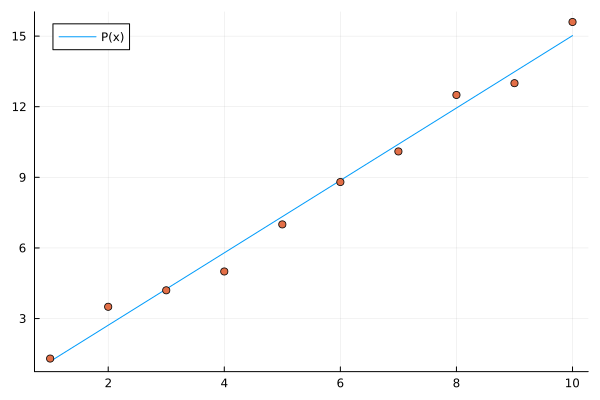

In [13]:
plot(1:1:10,p,label="P(x)")
scatter!(vecx,vecy, label="")

### Problema 3 : Paquete `LsqFit`

Utilice el paquete de Julia `LsqFit` para ajustar los datos del **Problema 2**. Para ello, 

* defina la función de ajuste,
* y proporcione valores iniciales para los parámetros de ajuste.

En este caso, serán $a_0$ y $a_1$ los parámetros que a ajustar para minimizar la diferencia entre la función y los datos experimentales.
Comparar resultados con los obtenidos en el **Problema 2**. Para ello, grafique los puntos, y el ajuste con `LsqFit` y, nuevamente, el ajuste del **Problema 2**.

In [14]:
using LsqFit

function modelo_lineal(x,p)
    return p[1].*x.+p[2]
end

fit=curve_fit(modelo_lineal,vecx,vecy,[0.0,1.0])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.5381818181643083, -0.3599999998929424], [-0.12181818172863412, -0.7836363635643258, 0.05454545459998261, 0.7927272727642904, 0.3309090909285999, 0.06909090909290683, 0.3072727272572173, -0.5545454545784754, 0.4836363635858323, -0.5781818182498579], [0.9999999999943678 0.9999999999868854; 1.9999999999887357 1.0000000000235538; … ; 8.99999999994931 1.0000000000235538; 9.999999999943679 1.0000000000235538], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [15]:
sol=coef(fit)

2-element Vector{Float64}:
  1.5381818181643083
 -0.3599999998929424

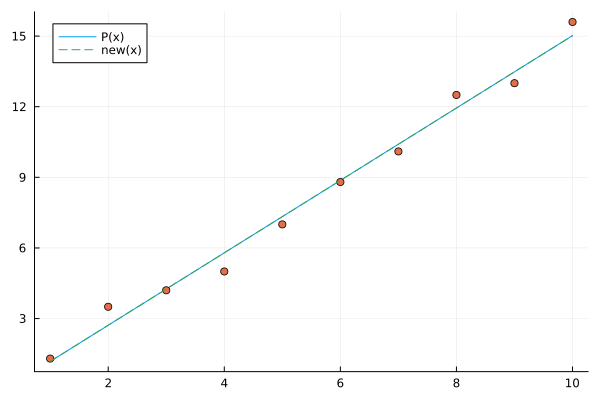

In [16]:
rangox=1:1:10
plot!(rangox,x->sol[1]*x + sol[2],label="new(x)", linestyle=:dash) #graficoi la nueva recta en punteado

In [17]:
estimate_errors(fit)

2-element Vector{Float64}:
 0.1374466886967922
 0.8528342752216456

### Problema 4 : Ajuste de modelo lineal

Supongamos que tenemos una serie de datos $\{x_i,y_i:i=1,...,n\}$ y que queremos ajustar un modelo $f$ definido por

$$
f(x,p) = p_1f_1(x)+p_2f_2(x)+...+p_mf_m(x)
$$

donde $f_1,f_2,...,f_m$ son algunas funciones de $x$ y $p_1,...,p_m$ son parámetros correspondientementes. Notar que $f$ depende linealmente de los parámetros. En particular, siempre se elige $f_1(x)=1$.

El Error Cuadrático

$$
d(p) = \sum_{i=1}^n (f(x_i,p)-y_i)^2
$$

es una medida de distancia que cuantifica cuán bien (o mal) la función $f$ ajusta los datos para cada elección de los parámetros. Su minimización con respecto al vector $p$ permite encontrar el ajuste óptimo. Las condiciones que determinan el valor de $p$ que minimiza $d$ pueden expresarse como un sistema lineal de $m$ ecuaciones para $m$ incógnitas (ver la derivación teórica abajo) 
$$
Ap = b
$$


1. Cargue los datos provistos en el archivo `cuadratica.dat` en dos vectores $x$ e $y$, y luego grafíquelos utilizando puntos.

2. Con dichos vectores, calcule la matriz $A$ y el vector $b$ para el caso particular en que $f_1(x) = 1$, $f_2(x) = x$ y $f_3(x) = x^2$.

3. Utilice $A$ y $b$ para encontrar el mejor ajuste $p$, y grafique el modelo ajustado junto a los datos.

4. Calcule la estimación de los errores de los parámetros ajustados (ver teoría abajo).

5. Repita el ajuste usando el paquete `LsqFit` y compare resultados.

### Teoría

##### Ajuste

Notar que el EC puede reescribirse matricialmente como

$$
d(p) = \sum_{i=1}^n (f(x_i,p)-y_i)^2 = (Fp-y)'(Fp-y) = |Fp-y|^2
$$

donde $p'=(p_1,p_2,...,p_m)$ es la forma traspuesta del vector $p$, $F$ es una matriz de $\mathbb{R}^{n\times m}$ de entradas $F_{ij} = f_j(x_i)$ e $y'=(y_1,...,y_n)$.

La construcción de dicha expresión matricial puede visualzarse facilmente de notar que buscamos el $p$ tal que

\begin{eqnarray}
p_1f_1(x_1)+...+p_mf_m(x_1) &\approx& y_1 \\
... && \\
p_1f_1(x_n)+...+p_mf_m(x_n) &\approx& y_n \\
\end{eqnarray}

Si $p$ minimiza globalmente a $d$, luego 
$$
\lim_{\epsilon \to 0} \frac{d(p+\epsilon q)-d(p)}{\epsilon}=0
$$
para todo vector $q$, o equivalentemente $(\nabla d)(p)=0$. Por otro lado, si bien la proposición recíproca no es generalmente cierta, la función a minimizar es una expresión cuadrática respecto de los parámetros en $p$, por lo que la condición $(\nabla d)(p)=0$ **sí** garantiza que $p$ sea mínimo global de $d$.

Para calcular el gradiente, reescribimos $d(p)$ (ver [1])

\begin{eqnarray}
d(p) &=& (Fp-y)'(Fp-y) \\
&=& (p'F'-y')(Fp-y) \\
&=& p'F'Fp - p'F'y - y'Fp + y'y \\
\end{eqnarray}

De esta manera, es fácil ver que (ver [2])

\begin{eqnarray}
\lim_{\epsilon\to 0}
\frac{d(p+\epsilon q)-d(p)}{\epsilon}
&=&
q'F'Fp + p'F'Fq - q'F'y - y'Fq
\\
&=&
q'(F'Fp-F'y) + (p'F'F-y'F)q
\\
&=&
q'c + c'q
\\
\end{eqnarray}

donde $F'$ es la traspuesta de $F$ y $c = F'Fp-F'y$.
Luego, $q'c + c'q=0$ se satisface para todo $q$ si y sólo si $c=0$, o equivalentemente, si y sólo si

$$
F'Fp=F'y
$$

Este es un sistema de ecuaciones lineales para $p$, 

$$
Ap=b
$$

donde $A:=F'F$ y $b:=F'y$.

Como comentario final, si las columnas de $F$ son linealmente independientes (típicamente lo son), luego $A=F'F$ es invertible y, por ende, $p=A^{-1}b=(F'F)^{-1}F'y$.
Aquí, $F^+:=(F'F)^{-1}F'$ es la denominada matriz pseudo-inversa de Moore-Penrose (ver [3]).

##### Estimación de errores

$\newcommand{\avrg}[1]{\langle #1 \rangle}$
Una estimación de la varianza del $i$-ésimo parámetro $p_i$ debido a los errores experimentales en las mediciones de los valores $y_j$ viene dada por (ver [4])

$$\mathrm{Var}(p_i) = \sigma^2 (F'F)^{-1}_{ii}$$

donde

$$\sigma^2 = \frac{1}{n-m}d(p)$$

es un estimador de la varianza del ruido en los valores de los $y_j$. Luego, una estimación del error asociado al $i$-ésimo parámetro $p_i$ es la raíz cuadrada de dicha varianza, $\sqrt{\mathrm{Var}(p_i)}$.

**Referencias**

[1] https://www.youtube.com/watch?v=jezAWd6GFRg

[2] https://math.stackexchange.com/questions/20694/vector-derivative-w-r-t-its-transpose-fracdaxdxt

[3] https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse

[4] https://stats.stackexchange.com/questions/216335/standard-error-for-a-parameter-in-ordinary-least-squares

**Ayuda:** Para cargar los datos, utilice los paquetes `CSV` y/o `DataFrames`, o utilice el código:

### Problema 5 : Ajuste no lineal

1. Utilizando el paquete `LsqFit`, ajuste un conjunto de mediciones almacenadas en el archivo de texto llamado `decaimiento.txt` con la función 
$$
F(t) = A \exp\bigg(-\frac{t}{T}\bigg)
$$

2. Determine los valores de $A$ y $T$ ajustados.

3. Genere un gráfico que muestre tanto los datos medidos como la curva ajustada.

In [ ]:
#llamar con 

## Ejemplos adicionales

### Problema 6 

El comportamiento de dos átomos ligados formando una molécula estable puede ser descripto en términos de las masas de los mismos, y una energía potencial $U(r)$ que depende de la distancia $r$ entre sus centros.
A distancias cortas, los átomos se repelen.
A distancias grandes, los átomos se atraen, manteniendo formada la molécula.
El potencial de Lennard-Jones es un modelo de $U(r)$ frecuentemente utilizado, y se define por
$$
U(r) = U_0 \bigg[ \bigg( \frac{r_0}{r} \bigg)^{12} - 2\bigg( \frac{r_0}{r} \bigg)^6  \bigg]
$$

Los parámetros $r_0$ y $U_0$ están empíricamente determinados por la molécula en consideración.
Distintas moléculas, requieren distintos valores de $r_0$ y $U_0$.
Para $r>r_0$ la pendiente de $U(r)$ es positiva, la fuerza es atractiva. 
Para $r<r_0$, la pendiente es negativa y la fuerza es fuertemente repulsiva.
Para $r=r_0$ la fuerza es nula (mínimo de la energía potencial) y por tanto la molécula está en equilibrio.

1. Grafique el potencial de Lennard-Jones usando $r_0=1[\mathring{A}]$ y $U_0=1[meV]$ para tener una idea de su forma.

2. Se realizaron mediciones del potencial $U(r)$ de una moleculada dada, a distintas distancias $r$. Los resultados obtenidos son:

    |$r$ [A] | $U(r)$ [meV] |
    |------|------------|
    |2.85  |  2.66542   |
    |2.90  |  1.01110   |
    |3.00  |  -1.07252  |
    |3.10  |  -2.11419  |
    |3.30  |  -2.67023  |
    |3.70  |  -2.00824  |
    |4.00  |  -1.41200  |
    |4.50  |  -0.75629  |
    |5.20  |  -0.32556  |
    |6.00  |  -0.13291  |
    |7.00  |  -0.04498  |
    |8.00  |  -0.01276  |

    donde $\mathring{A}$ indica una unidad de Angstrom. Determine los valores de $U_0$ y $r_0$ ajustando los datos de la tabla. Grafique simultaneamente los datos y el ajuste.

3. Considere la siguiente tabla e infiera que molécula fué medida

|Molécula  |$U_0$ [meV] |  $r_0$ [A] |
|----------|------|-----|
|Hidrógeno | 2.68 | 3.3 |
|Nitrógeno | 8.18 | 4.2 |
|Oxígeno   |10.11 | 3.9 |

### Problema 7

En este ejercicio aprenderá a leer los datos de un archivo similar el del ejercicio anterior, pero usando la librería `CSV.jl`. 

Ajuste los datos del archivo `math_pendulum.csv` con una función del tipo 

$$m(t,p) = p_1 + p_2\cos(p_3t + p_4)$$

1. Para ello, primero grafique los datos y obtenga parámetros aproximados a los fines de iniciar la búsqueda de los mejores parámetros.
2. Realize el ajuste con la librería `LsqFit`.
3. Grafique en un mismo gráfico los datos dados y la mejor aproximación.

**Ayuda:** para leer los datos use la siguiente expresión: